In [ ]:
#Step1: data preprocessing and descriptive statistics

In [4]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\grace\VisualStudioProject\Thesis-1\data.xlsm"

sheets_to_read = ['Llama0','Llama1','Gpt0','Gpt1','Deep0','Deep1','Hum1','Hum2']
dfs = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets_to_read}

numeric_cols = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

for df in dfs.values():
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].astype(float)

all_df = pd.concat(dfs.values(), ignore_index=True)

cols_order = ['question_id','question_text','accuracy_score','efficiency_score',
              'politeness_score','trust_score','satisfaction_score','risk_flag',
              'token_count','is_human','platform']
all_df = all_df[cols_order]

all_df[numeric_cols] = all_df[numeric_cols].fillna(all_df[numeric_cols].mean())

print(all_df.shape)
print(all_df.info())
print(all_df.isna().sum())
print(all_df.head(10))


(216, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   question_id         216 non-null    int64  
 1   question_text       216 non-null    object 
 2   accuracy_score      216 non-null    float64
 3   efficiency_score    216 non-null    float64
 4   politeness_score    216 non-null    float64
 5   trust_score         216 non-null    float64
 6   satisfaction_score  216 non-null    float64
 7   risk_flag           216 non-null    float64
 8   token_count         216 non-null    float64
 9   is_human            216 non-null    int64  
 10  platform            216 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 18.7+ KB
None
question_id           0
question_text         0
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag   

                  accuracy_score                     efficiency_score  \
                            mean       std  min  max             mean   
platform is_human                                                       
0        1              1.403975  0.620547  0.0  2.0         4.053026   
1        0              1.703704  0.460911  1.0  2.0         4.962963   
2        0              1.981481  0.136083  1.0  2.0         4.962963   
3        0              1.388889  0.737581  0.0  2.0         3.425926   

                                      politeness_score            ...  \
                        std  min  max             mean       std  ...   
platform is_human                                                 ...   
0        1         0.973276  1.0  5.0         3.534779  1.178690  ...   
1        0         0.190626  4.0  5.0         4.537037  0.503308  ...   
2        0         0.190626  4.0  5.0         4.222222  0.419643  ...   
3        0         1.573385  1.0  5.0         4.38

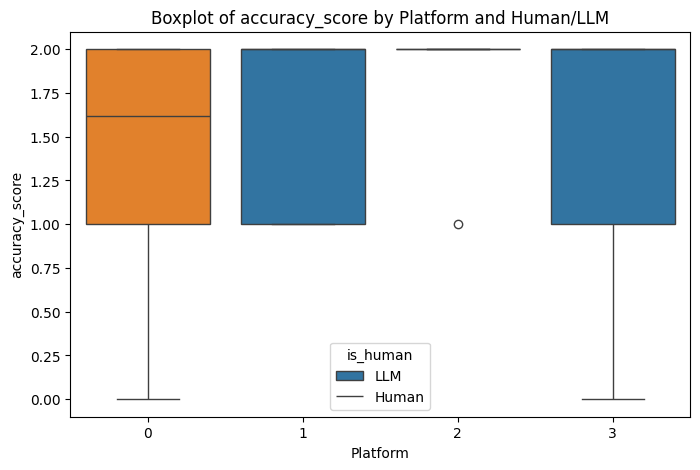

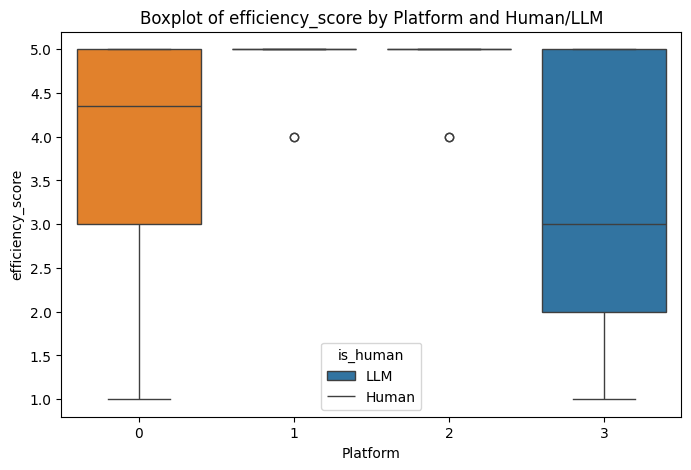

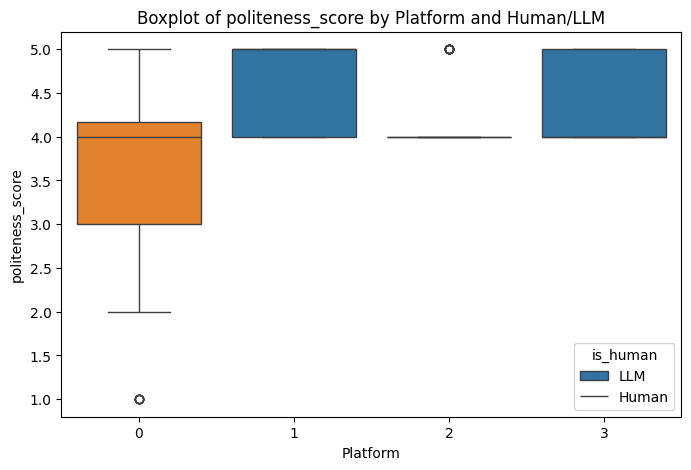

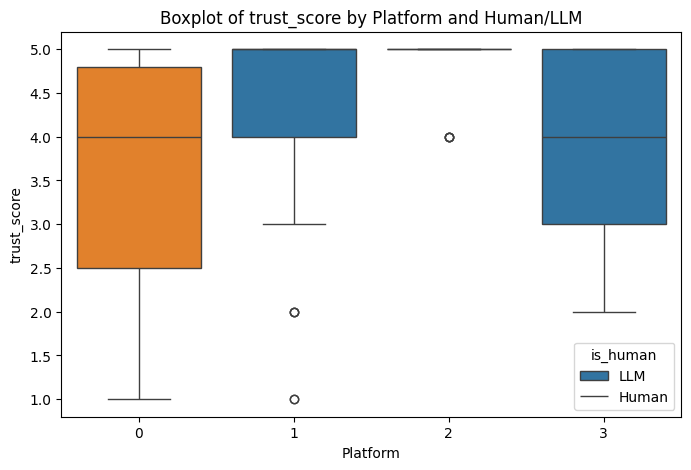

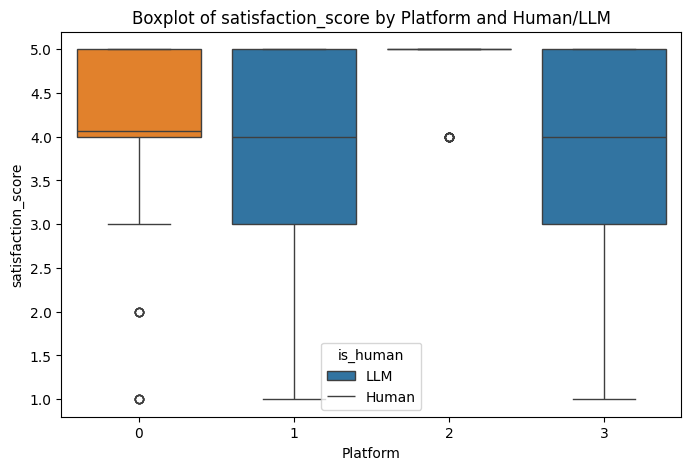

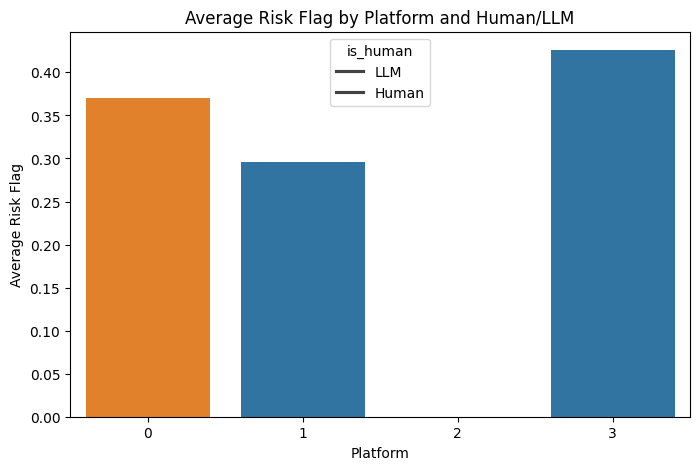

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by platform and is_human, calculate descriptive statistics
grouped_stats = all_df.groupby(['platform','is_human'])[numeric_cols].agg(['mean','std','min','max'])
print(grouped_stats)

# Boxplots for key scores
score_cols = ['accuracy_score','efficiency_score','politeness_score','trust_score','satisfaction_score']
for col in score_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='platform', y=col, hue='is_human', data=all_df)
    plt.title(f'Boxplot of {col} by Platform and Human/LLM')
    plt.xlabel('Platform')
    plt.ylabel(col)
    plt.legend(title='is_human', labels=['LLM','Human'])
    plt.show()

# Bar plot for risk_flag (average risk rate by platform and human/LLM)
risk_avg = all_df.groupby(['platform','is_human'])['risk_flag'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='platform', y='risk_flag', hue='is_human', data=risk_avg)
plt.title('Average Risk Flag by Platform and Human/LLM')
plt.xlabel('Platform')
plt.ylabel('Average Risk Flag')
plt.legend(title='is_human', labels=['LLM','Human'])
plt.show()
